In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [96]:
file_path = r"C:\Users\leube\Ironhack\Bootcamp\week_7\baby-weights-dataset.csv\baby-weights-dataset.csv"

df = pd.read_csv(file_path)
df

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,0,7.6250


In [5]:
df['HISPDAD']

0         M
1         N
2         N
3         N
4         N
         ..
101395    M
101396    N
101397    N
101398    N
101399    N
Name: HISPDAD, Length: 101400, dtype: object

In [6]:
df.isnull().sum()

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      1
VISITS      0
MAGE        0
FEDUC       1
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       1
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      1
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      1
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype: int64

In [7]:
file_path2 = r"C:\Users\leube\Ironhack\Bootcamp\week_7\judge-without-labels.csv"
df2 = pd.read_csv(file_path2)
df2

,ID,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,...,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,1,1,5400,54,1,3/25/08,3,25,2008,2,...,2,0,0,0,0,0,0,0,0,0
1,2,1,4195,41,1,9/3/08,9,3,2008,1,...,2,0,0,0,0,0,0,0,0,0
2,3,1,8200,82,1,9/25/08,9,25,2008,1,...,2,0,0,0,0,0,0,0,0,0
3,4,1,4500,45,1,9/3/08,9,3,2008,1,...,2,0,0,0,0,0,0,0,0,0
4,5,1,9200,92,1,8/22/08,8,22,2008,2,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,8370,83,1,9/29/08,9,29,2008,2,...,2,0,0,0,0,0,0,0,0,0
1996,1997,1,3390,33,1,12/11/08,12,11,2008,1,...,2,0,0,0,0,0,0,0,0,0
1997,1998,1,3200,32,1,9/12/08,9,12,2008,1,...,2,0,0,0,0,0,0,0,0,0
1998,1999,1,9890,98,1,10/13/08,10,13,2008,2,...,2,0,0,0,0,0,0,0,0,0


In [8]:
df2.columns

Index(['ID', 'INST', 'RPLACE', 'RCOUNTY', 'PLURAL', 'BDATE', 'BMONTH', 'BDAY',
       'BYEAR', 'SEX',
       ...
       'MOTHERTR', 'IANEMIA', 'BINJURY', 'FAS', 'HYALINE', 'ASPIRATE',
       'VENTLESS', 'VENTMORE', 'ISEIZURE', 'OTHINF'],
      dtype='object', length=124)

In [9]:
df2.isnull().sum()

ID          0
INST        0
RPLACE      0
RCOUNTY     0
PLURAL      0
           ..
ASPIRATE    0
VENTLESS    0
VENTMORE    0
ISEIZURE    0
OTHINF      0
Length: 124, dtype: int64

In [10]:
column_names = df.columns
column_names

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE', 'BWEIGHT'],
      dtype='object')

In [11]:
columns_to_keep = ['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE']

In [12]:
df_filtered = df2.loc[:, columns_to_keep]

In [13]:
df_filtered

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
0,1,2,2,99,23,8,41,99,16,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2,99,35,15,21,99,9,2,...,0,0,0,0,0,0,1,0,0,0
2,3,1,2,24,25,10,23,10,6,3,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,22,22,13,26,14,14,5,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,26,25,18,24,16,13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2,1,31,22,11,31,14,17,4,...,0,0,0,0,0,0,0,0,0,0
1996,1997,1,2,99,34,18,21,99,12,1,...,0,0,0,0,0,0,0,0,0,0
1997,1998,1,1,29,24,9,27,14,12,3,...,0,0,0,0,0,0,0,0,0,0
1998,1999,2,1,30,29,15,27,14,14,3,...,0,0,0,0,0,1,0,0,0,0


In [14]:
df2.columns

Index(['ID', 'INST', 'RPLACE', 'RCOUNTY', 'PLURAL', 'BDATE', 'BMONTH', 'BDAY',
       'BYEAR', 'SEX',
       ...
       'MOTHERTR', 'IANEMIA', 'BINJURY', 'FAS', 'HYALINE', 'ASPIRATE',
       'VENTLESS', 'VENTMORE', 'ISEIZURE', 'OTHINF'],
      dtype='object', length=124)

In [15]:
mapping = {'M': 1, 'N': 2, 'S': 3, 'P': 4, 'P': 5, 'U': 6, 'O': 7}

df_filtered['HISPMOM'] = df_filtered['HISPMOM'].map(mapping)
df_filtered['HISPDAD'] = df_filtered['HISPDAD'].map(mapping)

In [16]:
df['HISPMOM'] = df['HISPMOM'].map(mapping)
df['HISPDAD'] = df['HISPDAD'].map(mapping)

In [17]:
df_filtered = df_filtered.dropna()

In [18]:
df_filtered.isna().sum()

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      0
VISITS      0
MAGE        0
FEDUC       0
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       0
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      0
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      0
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      0
VISITS      0
MAGE        0
FEDUC       0
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       0
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      0
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      0
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype: int64

In [21]:
X = df.drop('BWEIGHT', axis=1)
y = df['BWEIGHT']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
knn = KNeighborsRegressor(n_neighbors=10)

In [24]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [25]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test, y_test): .2f}")

The R2 of the model on the TEST set is: -0.03


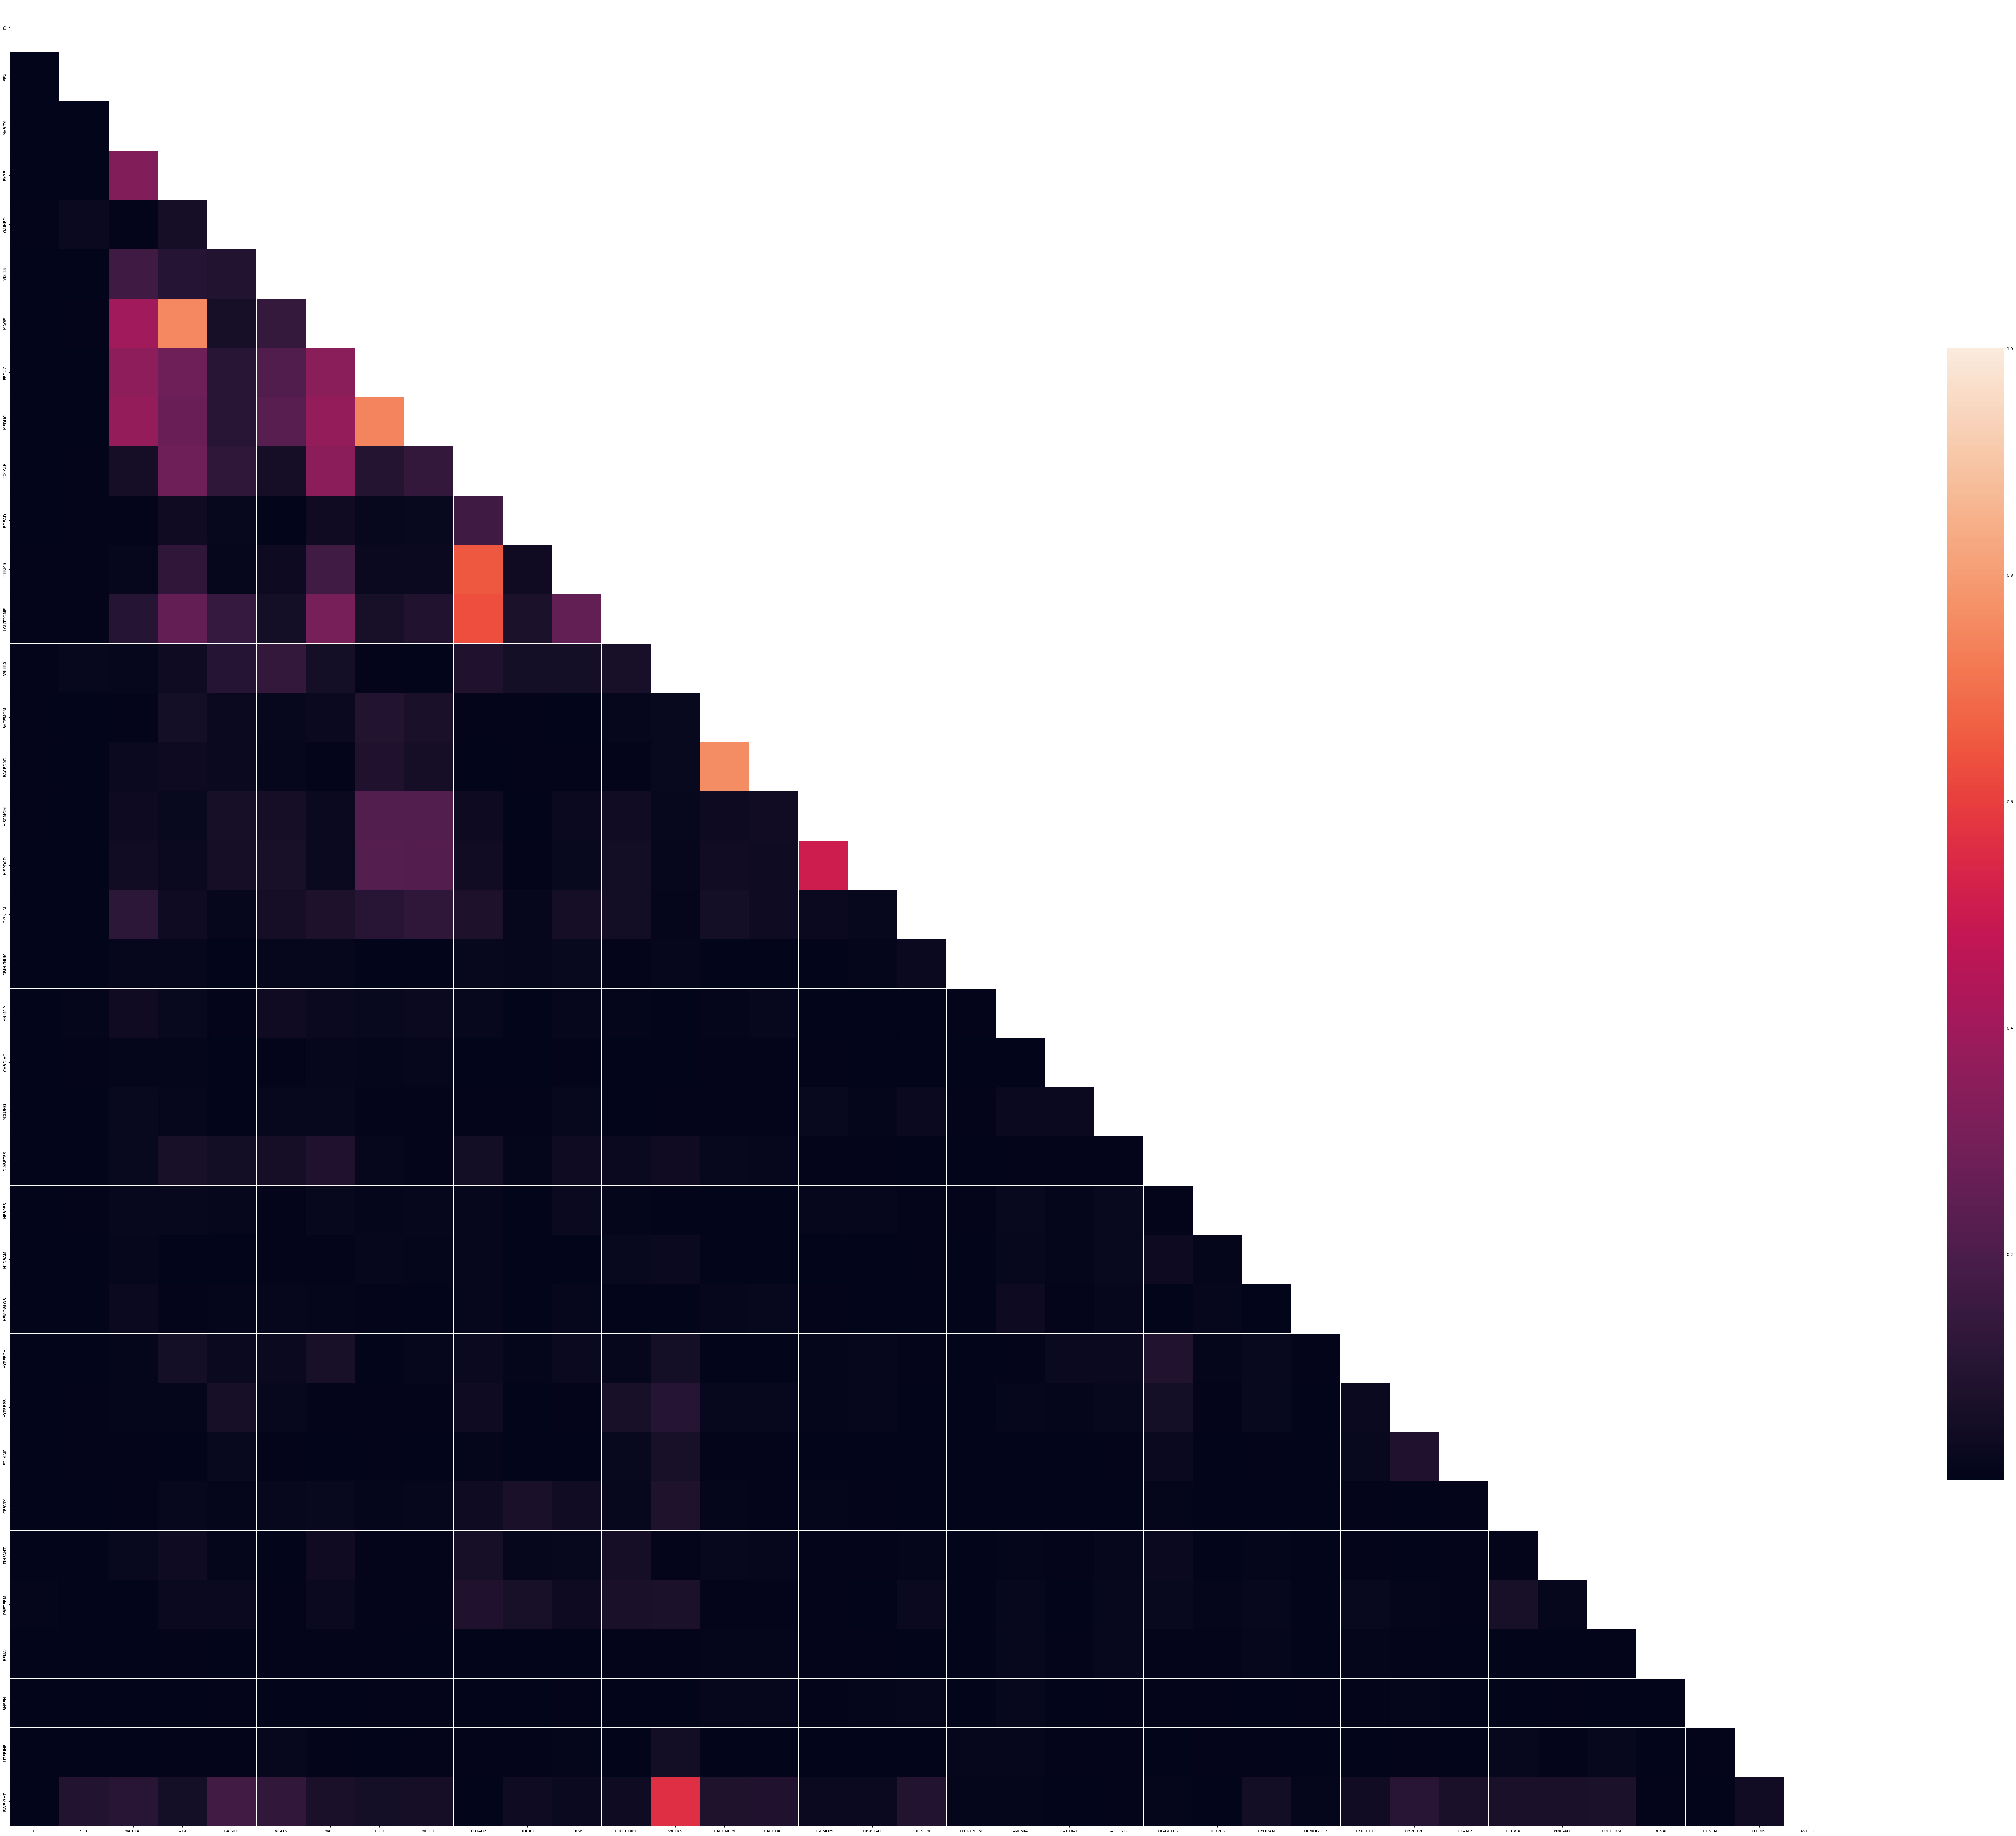

In [26]:
corr=np.abs(df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 100))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [27]:
normalizer = MinMaxScaler()

In [28]:
normalizer.fit(X_train)

MinMaxScaler()

In [29]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [30]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
95,0.000937,0.0,0.0,0.166667,0.346939,0.265306,0.200,0.882353,0.764706,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58858,0.580465,0.0,0.0,0.133333,0.193878,0.142857,0.175,0.529412,0.705882,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2599,0.025632,0.0,0.0,0.166667,0.642857,0.163265,0.225,0.705882,0.588235,0.157895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12438,0.122665,1.0,0.0,0.466667,0.132653,0.265306,0.575,0.941176,0.941176,0.210526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89569,0.883341,1.0,0.0,0.250000,0.418367,0.265306,0.450,0.882353,0.941176,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
25442,0.250912,0.0,0.0,0.333333,0.020408,0.244898,0.425,0.705882,0.882353,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36536,0.360323,0.0,0.0,0.333333,0.122449,0.244898,0.500,0.705882,0.705882,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74472,0.734452,1.0,0.0,0.250000,0.000000,0.306122,0.350,0.588235,0.764706,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19390,0.191227,0.0,0.0,0.300000,0.285714,0.204082,0.450,0.823529,0.941176,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80708,0.795953,0.0,0.0,0.300000,0.336735,0.510204,0.750,1.000000,0.941176,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [33]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm, y_test): .2f}")

The R2 of the model on the TEST set is:  0.28


In [34]:
X_train_norm_updated = X_train_norm.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [35]:
y_train_updated = y_train.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [36]:
knn.fit(X_train_norm_updated, y_train_updated)

KNeighborsRegressor(n_neighbors=10)

In [37]:
X_test_norm_updated = X_test_norm.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [38]:
y_test_updated = y_test.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [39]:
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm_updated, y_test_updated): .2f}")

The R2 of the model on the TEST set is:  0.30


In [41]:
df_filtered['HISPDAD']

array([6., 1., 2., 3., 5.])

In [42]:
X_test_norm_updated

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,BDEAD,...,RACEDAD,CIGNUM,HYDRAM,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,UTERINE
25442,0.250912,0.0,0.0,0.333333,0.020408,0.244898,0.425,0.705882,0.882353,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36536,0.360323,0.0,0.0,0.333333,0.122449,0.244898,0.500,0.705882,0.705882,0.0,...,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74472,0.734452,1.0,0.0,0.250000,0.000000,0.306122,0.350,0.588235,0.764706,0.0,...,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19390,0.191227,0.0,0.0,0.300000,0.285714,0.204082,0.450,0.823529,0.941176,0.0,...,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80708,0.795953,0.0,0.0,0.300000,0.336735,0.510204,0.750,1.000000,0.941176,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30809,0.303842,1.0,1.0,0.100000,0.204082,0.244898,0.175,0.705882,0.705882,0.0,...,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51765,0.510513,0.0,0.0,0.216667,0.500000,0.224490,0.200,0.647059,0.823529,0.0,...,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39505,0.389603,0.0,0.0,0.150000,0.377551,0.163265,0.250,0.823529,0.705882,0.0,...,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86376,0.851851,0.0,0.0,0.350000,0.459184,0.408163,0.425,1.000000,0.882353,0.0,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
lin_reg = LinearRegression()

In [46]:
lin_reg.fit(X_train_norm_updated, y_train_updated)

LinearRegression()

In [49]:
y_pred_test = lin_reg.predict(X_test_norm_updated)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test_updated): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"RMSE, {mean_squared_error(y_pred_test, y_test_updated, squared=False): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_norm_updated, y_test_updated): .2f}")

MAE  0.81
RMSE,  1.04
R2 score,  0.38


In [66]:
scaler = StandardScaler()

scaler.fit(X_train_updated)

StandardScaler()

In [63]:
X_train_updated = X_train.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [64]:
X_test_updated = X_test.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [67]:
X_train_standarized_np = scaler.transform(X_train_updated)
X_test_standarized_np = scaler.transform(X_test_updated)

X_train_standarized_df = pd.DataFrame(X_train_standarized_np, columns = X_train_updated.columns, index=X_train_updated.index)
X_test_standarized_df  = pd.DataFrame(X_test_standarized_np, columns = X_test_updated.columns, index=X_test_updated.index)


In [68]:
y_pred_test2 = lin_reg.predict(X_test_standarized_df)

#lin_reg.score(X_test_norm_df, y_test)

print(f"MAE {mean_absolute_error(y_pred_test2, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"RMSE, {mean_squared_error(y_pred_test2, y_test, squared=False): .2f}") # sqrt( mean( (y_test - y_pred_test)^2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_standarized_df, y_test): .2f}")

MAE  7.36
RMSE,  10.04
R2 score, -57.04


In [70]:
df['BWEIGHT'].unique()

array([ 4.375 ,  6.9375,  8.5   ,  9.    ,  8.    ,  7.    ,  7.375 ,
        8.1875,  7.0625,  6.25  ,  6.375 ,  5.75  ,  8.4375,  7.3125,
        6.8125,  7.625 ,  6.0625,  6.6875,  7.9375,  7.875 ,  3.25  ,
        8.9375,  6.5   ,  5.125 ,  0.875 ,  9.1875,  8.5625,  6.5625,
        5.6875,  9.25  ,  4.6875,  6.625 ,  5.375 ,  7.75  ,  7.8125,
        8.25  ,  8.0625,  7.125 ,  4.25  ,  7.5   ,  4.3125,  6.1875,
        4.75  ,  6.75  ,  4.    ,  7.5625,  5.625 ,  8.125 ,  6.875 ,
        7.4375,  6.4375,  0.625 ,  8.75  ,  8.625 ,  9.75  ,  7.25  ,
        5.9375,  8.8125,  8.375 ,  5.875 ,  9.3125,  6.    ,  7.6875,
        3.1875,  5.1875,  4.5625,  4.9375,  6.3125,  9.8125,  6.125 ,
        7.1875, 10.3125,  8.3125,  9.875 ,  4.875 ,  3.9375,  5.4375,
        9.5   ,  9.0625,  5.8125,  3.875 ,  2.9375,  9.375 ,  0.9375,
        4.125 ,  9.125 ,  4.1875,  5.3125,  5.5   ,  3.75  ,  9.5625,
       11.75  , 11.    ,  9.6875,  8.6875,  4.8125,  9.9375,  2.25  ,
        5.25  ,  4.6

In [97]:
df

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,0,7.6250


In [98]:
df['BWEIGHT'] = df['BWEIGHT'].apply(lambda x: round(x * 2) / 2)

In [99]:
df

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.5
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,7.0
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,0,9.0
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,0,7.5
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,0,7.5
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,0,7.5


In [105]:
mapping = {'M': 1, 'N': 2, 'S': 3, 'P': 4, 'P': 5, 'U': 6, 'O': 7}

df['HISPMOM'] = df['HISPMOM'].map(mapping)
df['HISPDAD'] = df['HISPDAD'].map(mapping)

In [107]:
Xn = df.drop('BWEIGHT', axis=1)
yn = df['BWEIGHT']

In [108]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

In [109]:
normalizer.fit(Xn_train)

MinMaxScaler()

In [110]:
Xn_train_norm = normalizer.transform(Xn_train)

Xn_test_norm = normalizer.transform(Xn_test)

In [111]:
Xn_train_norm = pd.DataFrame(Xn_train_norm, columns=Xn_train.columns, index=Xn_train.index )
Xn_train_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
60249,0.594183,0.000,0.0,0.366667,0.306122,0.367347,0.333333,0.705882,0.823529,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30125,0.297097,0.000,1.0,0.233333,0.204082,0.122449,0.523810,0.529412,0.529412,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44616,0.440009,0.125,0.0,0.400000,0.255102,0.265306,0.619048,0.764706,0.882353,0.111111,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57489,0.566964,0.000,0.0,0.283333,0.285714,0.285714,0.476190,0.647059,0.882353,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71948,0.709560,0.125,0.0,0.350000,0.306122,0.408163,0.547619,0.941176,0.941176,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
Xn_test_norm = pd.DataFrame(Xn_test_norm, columns=Xn_test.columns, index=Xn_test.index)
Xn_test_norm.head()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE
80763,0.796495,0.125,0.0,0.516667,0.357143,0.122449,0.523810,0.705882,0.705882,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78989,0.779000,0.125,1.0,0.133333,0.408163,0.183673,0.142857,0.705882,0.647059,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71952,0.709600,0.125,1.0,0.266667,0.306122,0.265306,0.476190,0.705882,0.705882,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96561,0.952297,0.125,0.0,0.250000,0.387755,0.285714,0.333333,0.823529,0.705882,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51212,0.505059,0.000,0.0,0.383333,0.204082,0.408163,0.380952,0.882353,1.000000,0.055556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
Xn_train_norm_updated = Xn_train_norm.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [115]:
yn_train_updated = yn_train.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [116]:
Xn_test_norm_updated = Xn_test_norm.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [117]:
yn_test_updated = yn_test.drop(columns=['RHSEN', 'RENAL', 'HEMOGLOB', 'HERPES', 'DIABETES', 'ACLUNG', 'CARDIAC', 'ANEMIA', 'DRINKNUM', 'HISPMOM', 'HISPDAD', 'TOTALP'], axis=1)

In [118]:
lin_reg3 = LinearRegression()

In [93]:
lin_reg.fit(Xn_train_norm_updated, yn_train_updated)

ValueError: could not convert string to float: '8.5-9'